In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Research Paper - Improving the accuracy of prediction of heart disease risk based on ensemble classification techniques
[Original Source of Data](https://www.sciencedirect.com/science/article/pii/S235291481830217X#:~:text=Restecg%20is%20the%20resting%20electrocardiographic,is%20the%20number%20of%20major)

Credits - **C. Beulah Christalin Latha**, **S. Carolin Jeeva** 

## About this Dataset

This dataset contains information related to heart disease diagnosis. The following features are included:

- **Age:** Age of the patient
- **Sex:** Sex of the patient
- **exang:** Exercise-induced angina (1 = yes; 0 = no)
- **caa:** Number of major vessels (0-3), ca is the number of major vessels colored by fluoroscopy
- **cp:** Chest pain type
  - Value 1: Typical angina
  - Value 2: Atypical angina
  - Value 3: Non-anginal pain
  - Value 4: Asymptomatic
- **trtbps:** Resting blood pressure (in mm Hg)
- **chol:** Cholesterol in mg/dl fetched via BMI sensor
- **fbs:** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **rest_ecg:** Resting electrocardiographic results
  - Value 0: Normal
  - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach:** Maximum heart rate achieved
- **target:** 0 = Less chance of heart attack, 1 = More chance of heart attack


In [115]:
data = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# All the Variables are having numerical values, So Encoding isn't required. we can proceed further with EDA

Checking for Duplicates

In [116]:
data.shape

(303, 14)

In [117]:
data.duplicated().sum()

1

In [118]:
data.drop_duplicates(inplace=True)

No Null Values present in any column

In [119]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [120]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [121]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

# Analyzing Each column - EDA

## 1: Age

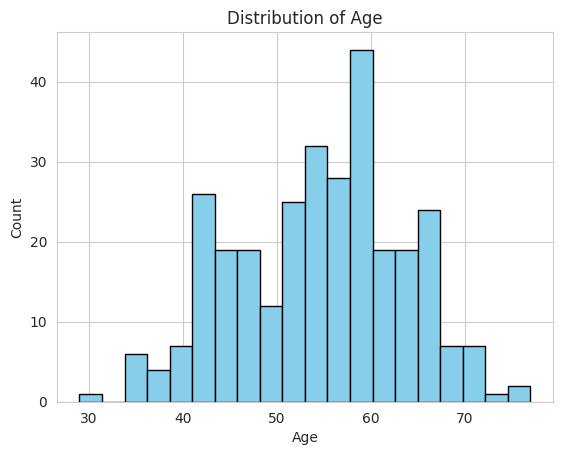

In [122]:
import matplotlib.pyplot as plt

plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show plot
plt.show()

In [123]:
# Calculate minimum and maximum age
min_age = data['age'].min()
max_age = data['age'].max()

print(f"The minimum age in the dataset is: {min_age}")
print(f"The maximum age in the dataset is: {max_age}")


The minimum age in the dataset is: 29
The maximum age in the dataset is: 77


## 2: Sex

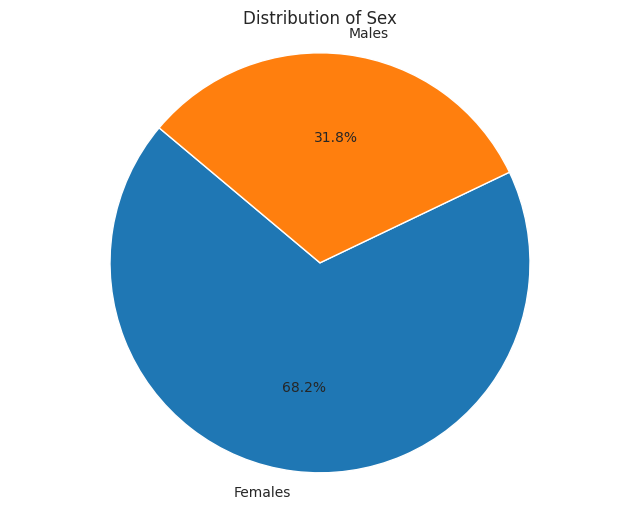

In [124]:
custom_labels = ['Females', 'Males']

# Count the occurrences of each sex category
sex_counts = data['sex'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

As no information is given about the encoding so we are taking 0 - for men and 1 - for women, as we know that, Women are more likely than men to suffer (Twice) from diseases that mimic a heart attack.
source - [link](https://give.brighamandwomens.org/7-differences-between-men-and-women/)

## Analysing the Relation Between age and gender

In [125]:
import seaborn as sns

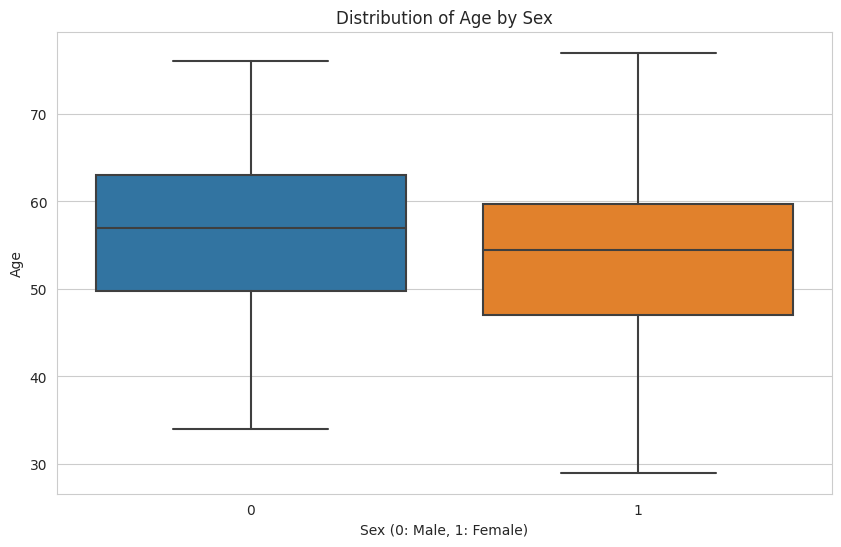

In [126]:
sns.set_style("whitegrid")

# Plotting the distribution of age for each sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=data)
plt.title('Distribution of Age by Sex')
plt.xlabel('Sex (0: Male, 1: Female)')
plt.ylabel('Age')
plt.show()

In [127]:
males = data[data['sex'] == 0].count().iloc[0] # Males count
females = data[data['sex'] == 1].count().iloc[0] # Females count

print("Males count :", males)
print("Females count :", females)


Males count : 96
Females count : 206


In [128]:
male_ha = data[(data['sex'] == 0) & (data['output'] == 1)].shape[0]
female_ha = data[(data['sex'] == 1) & (data['output'] == 1)].shape[0]

print("Count of males with risk of heart attack:", male_ha)
print("Count of females with risk of heart attack:", female_ha)


Count of males with risk of heart attack: 72
Count of females with risk of heart attack: 92


In [129]:
print('percentage of males with risk of Heart attack', round((male_ha/males)*100,2), "%")
print('percentage of females with risk of Heart attack', round((female_ha/females)*100,2), "%")

percentage of males with risk of Heart attack 75.0 %
percentage of females with risk of Heart attack 44.66 %


## 3: CP - Chest pain

Variable "cp" represents the type of chest pain experienced by the patients. Different types of chest pain may indicate different levels of risk for a heart attack:

***Typical Angina (Value - 0):*** This type of chest pain is usually associated with a higher risk of a heart attack. It typically occurs when the heart muscle doesn't get enough oxygen-rich blood, often due to narrowed coronary arteries.

***Atypical Angina (Value - 1):*** Atypical angina is chest pain that doesn't fit the typical pattern of heart-related chest pain. While it may still indicate a risk of heart problems, it's not as specific as typical angina in predicting a heart attack.

***Non-Anginal Pain (Value - 2):*** This type of chest pain is not related to the heart. It might be caused by problems in the lungs, muscles, or other areas. Non-anginal pain is less likely to be associated with a heart attack.

***Asymptomatic (Value - 3):*** Asymptomatic means without symptoms. Patients with asymptomatic chest pain do not experience any noticeable chest pain or discomfort. However, they may still have underlying heart issues that could lead to a heart attack in the future, especially if other risk factors are present.

In [130]:
cp_count = data['cp'].value_counts()
print(cp_count)

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


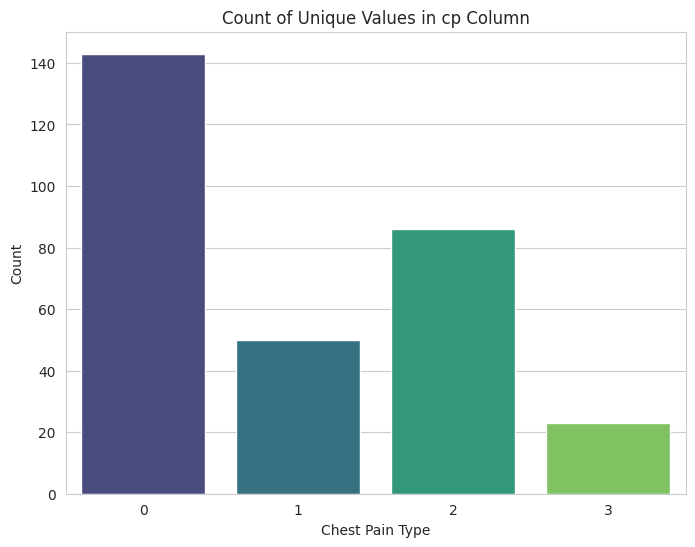

In [131]:
# Creating a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cp_count.index, y=cp_count.values, palette="viridis")
plt.title('Count of Unique Values in cp Column')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

Major portion of people are having *Typical Angina*, which is a type of chest pain is usually **associated** with a **higher risk of a heart attack**. It typically occurs when the heart muscle doesn't get enough oxygen-rich blood, often due to narrowed coronary arteries, **Count of patients = 143**


In [132]:
# Filter the dataframe where the 'output' column is 1
output_1_data = data[data['output'] == 1]

# Filter the data for males
males_output_1_data = output_1_data[output_1_data['sex'] == 0]

# Filter the data for females
females_output_1_data = output_1_data[output_1_data['sex'] == 1]

# Count the occurrences of each unique value in the 'cp' column for males
males_cp_counts_output_1 = males_output_1_data['cp'].value_counts()

# Count the occurrences of each unique value in the 'cp' column for females
females_cp_counts_output_1 = females_output_1_data['cp'].value_counts()

In [133]:
# Creating a dictionary mapping numeric values to chest pain names
chest_pain_names = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-Anginal Pain',
    3: 'Asymptomatic'
}

# counts of males with each type of chest pain for output=1
print("Counts of males with each type of chest pain, associated with high risk of Heart Attack:")
for cp_value, count in males_cp_counts_output_1.items():
    print(f"{chest_pain_names[cp_value]}: {count}")

# counts of females with each type of chest pain for output=1
print("\nCounts of females with each type of chest pain, associated with high risk of Heart Attack:")
for cp_value, count in females_cp_counts_output_1.items():
    print(f"{chest_pain_names[cp_value]}: {count}")


Counts of males with each type of chest pain, associated with high risk of Heart Attack:
Non-Anginal Pain: 34
Typical Angina: 18
Atypical Angina: 16
Asymptomatic: 4

Counts of females with each type of chest pain, associated with high risk of Heart Attack:
Non-Anginal Pain: 34
Atypical Angina: 25
Typical Angina: 21
Asymptomatic: 12


we found that most people were having Typical Agina, but People having High risk of Heart Attack mostly have Non-Aginal Pain, which is a type of chest pain, that is not related to the heart. It might be caused by problems in the lungs, muscles, or other areas. 

we don't have a enough data to conclude anything solid, but we will go with what we have, we will develop a model based on this data.

# 4: trtbps - Resting blood pressure (in mm Hg)

Let's try to figure out the relation between blood pressure, age, sex and CP

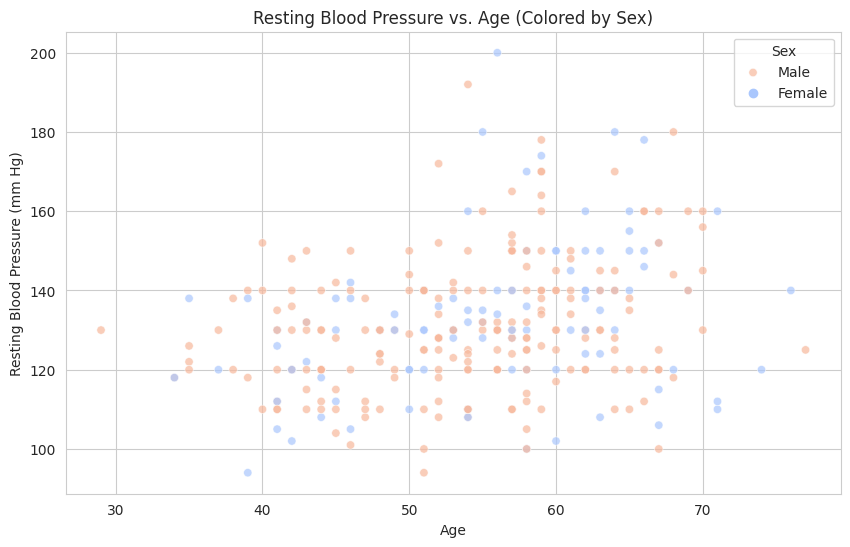

In [134]:

# Scatter plot of resting blood pressure vs. age colored by sex
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='trtbps', hue='sex', palette='coolwarm', alpha=0.7)
plt.title('Resting Blood Pressure vs. Age (Colored by Sex)')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.legend(title='Sex', labels=['Male', 'Female'], loc='upper right')  # Updated legend titles
plt.show()



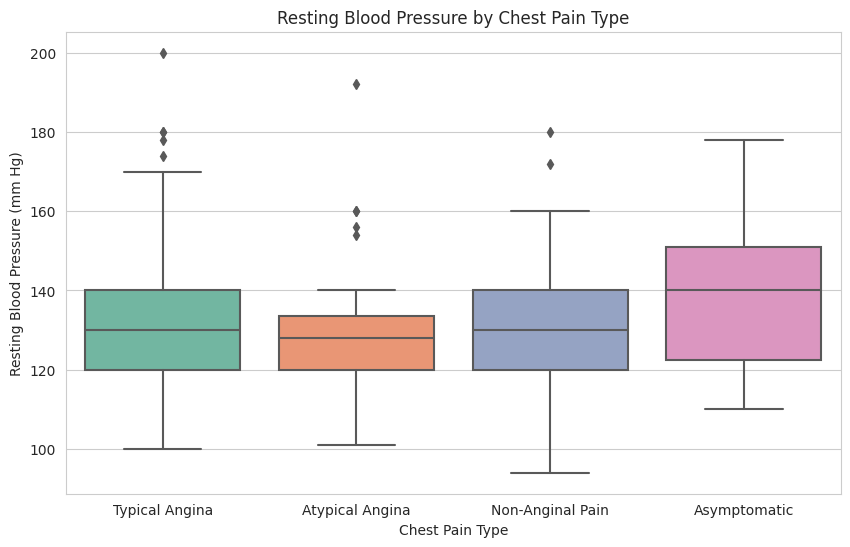

In [135]:
# Box plot of resting blood pressure by chest pain type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='cp', y='trtbps', palette='Set2')
plt.title('Resting Blood Pressure by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.show()



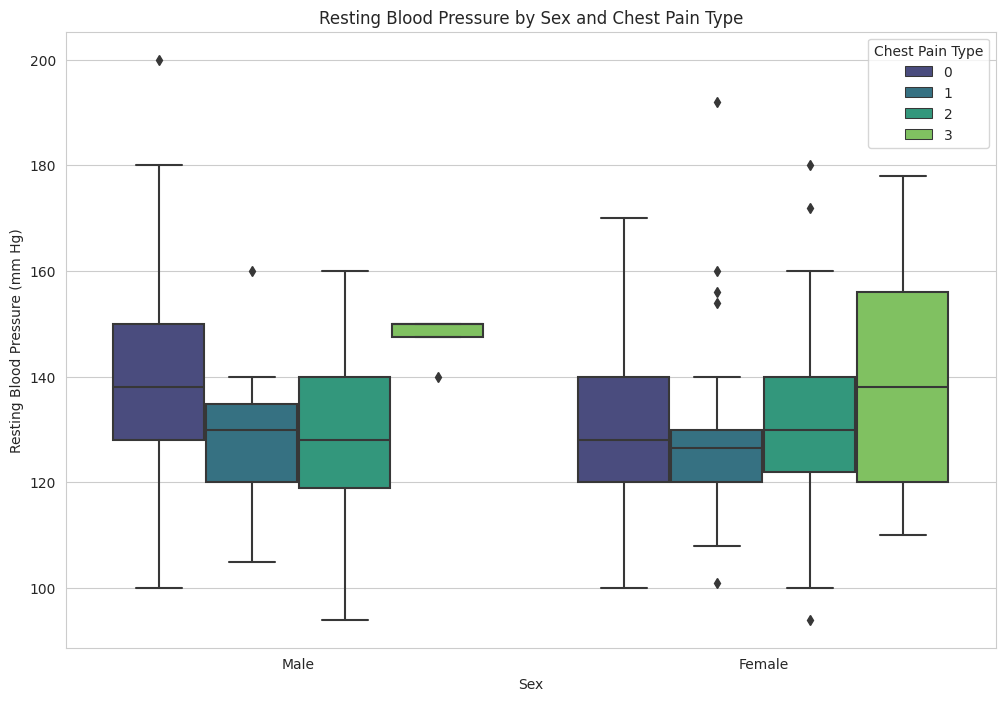

In [136]:
# Box plot of resting blood pressure by sex and chest pain type
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='sex', y='trtbps', hue='cp', palette='viridis')
plt.title('Resting Blood Pressure by Sex and Chest Pain Type')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Chest Pain Type', loc='upper right')
plt.show()

# 5: Cholesterol in mg/dl fetched via BMI sensor

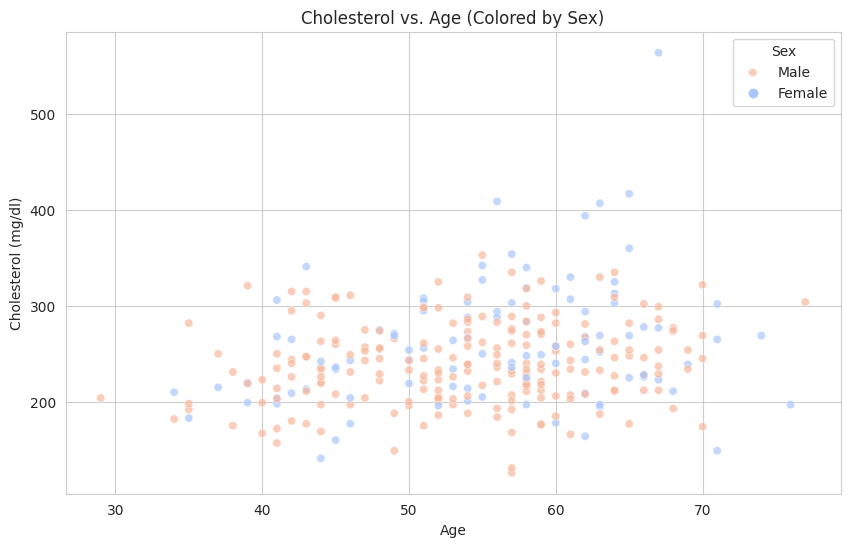

In [137]:
# Scatter plot of cholesterol vs. age colored by sex
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol', hue='sex', palette='coolwarm', alpha=0.7)
plt.title('Cholesterol vs. Age (Colored by Sex)')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.legend(title='Sex', labels=['Male', 'Female'], loc='upper right')
plt.show()


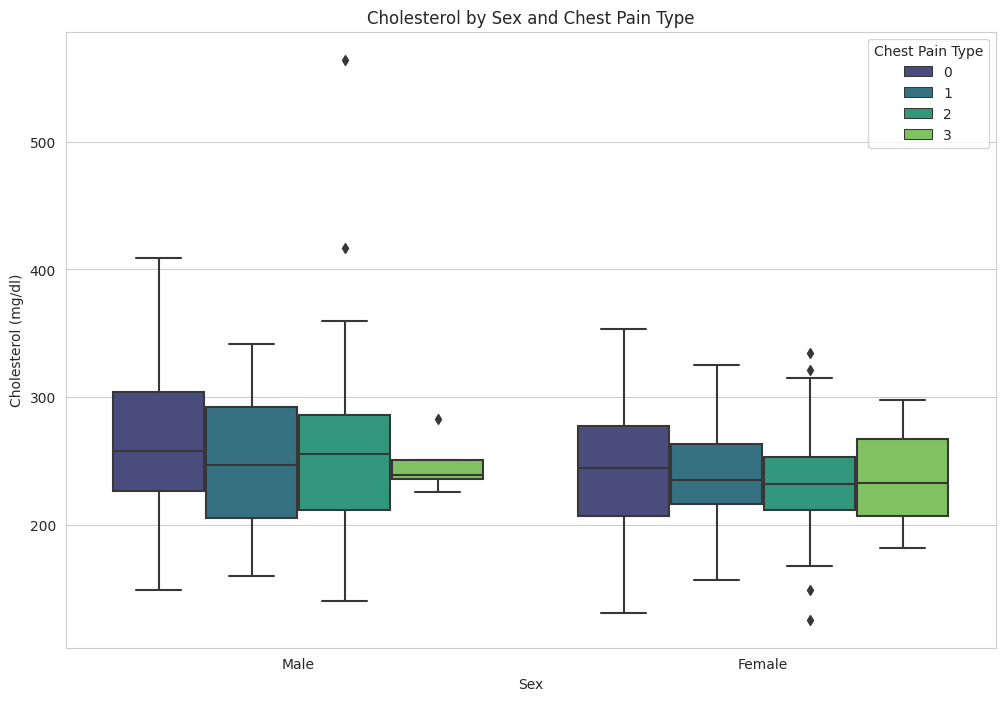

In [138]:
# Box plot of cholesterol by sex and chest pain type
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='sex', y='chol', hue='cp', palette='viridis')
plt.title('Cholesterol by Sex and Chest Pain Type')
plt.xlabel('Sex')
plt.ylabel('Cholesterol (mg/dl)')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Chest Pain Type', loc='upper right')
plt.show()


In [139]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# 6: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)


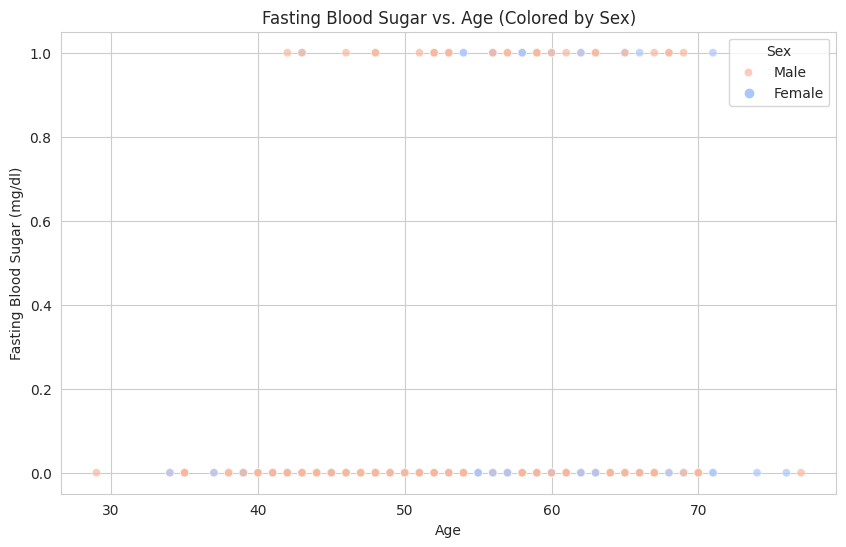

In [140]:
# Scatter plot of fasting blood sugar vs. age colored by sex
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='fbs', hue='sex', palette='coolwarm', alpha=0.7)
plt.title('Fasting Blood Sugar vs. Age (Colored by Sex)')
plt.xlabel('Age')
plt.ylabel('Fasting Blood Sugar (mg/dl)')
plt.legend(title='Sex', labels=['Male', 'Female'], loc='upper right')
plt.show()




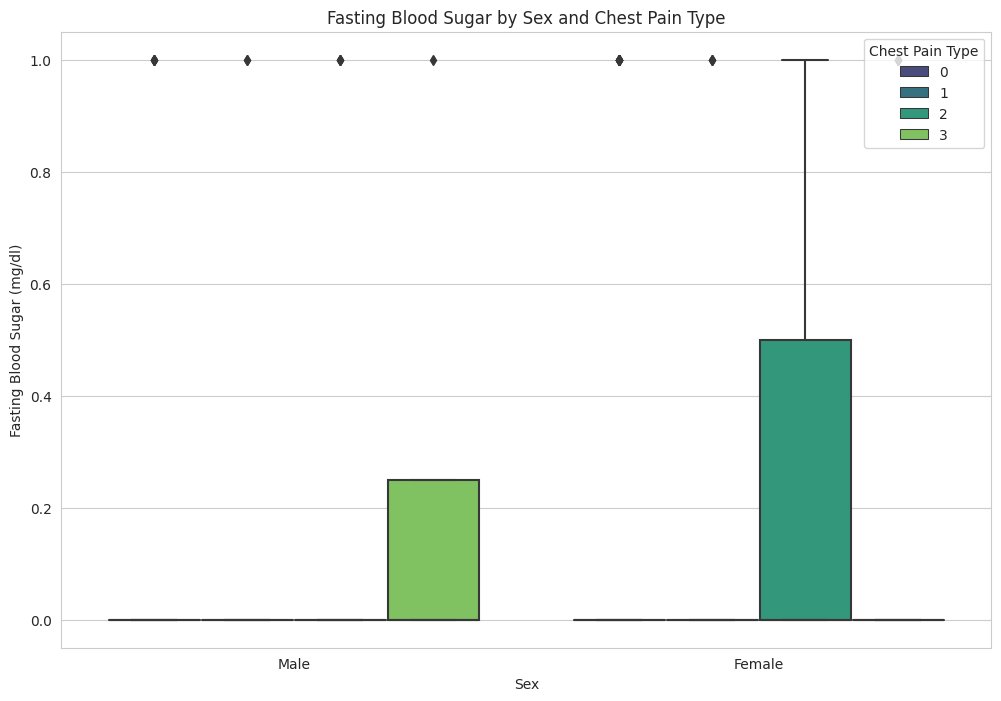

In [141]:
# Box plot of fasting blood sugar by sex and chest pain type
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='sex', y='fbs', hue='cp', palette='viridis')
plt.title('Fasting Blood Sugar by Sex and Chest Pain Type')
plt.xlabel('Sex')
plt.ylabel('Fasting Blood Sugar (mg/dl)')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Chest Pain Type', loc='upper right')
plt.show()


In [142]:
# Count of fasting blood sugar for males and females
male_fbs_count = data[data['sex'] == 0]['fbs'].value_counts()
female_fbs_count = data[data['sex'] == 1]['fbs'].value_counts()

print("Count of fasting blood sugar for males:")
print(male_fbs_count)

print("\nCount of fasting blood sugar for females:")
print(female_fbs_count)


Count of fasting blood sugar for males:
fbs
0    84
1    12
Name: count, dtype: int64

Count of fasting blood sugar for females:
fbs
0    173
1     33
Name: count, dtype: int64


# 7 rest_ecg: Resting electrocardiographic results
* Normal - 0
* Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) - 1
* Showing probable or definite left ventricular hypertrophy by Estes' criteria - 2

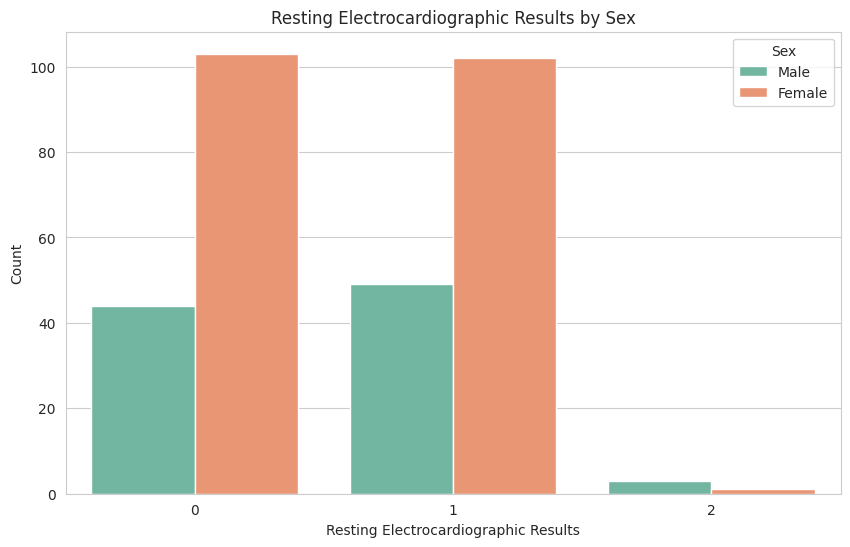

In [143]:
sns.set_style("whitegrid")

# Plot rest_ecg with respect to sex
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='restecg', hue='sex', palette='Set2')
plt.title('Resting Electrocardiographic Results by Sex')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'], loc='upper right')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

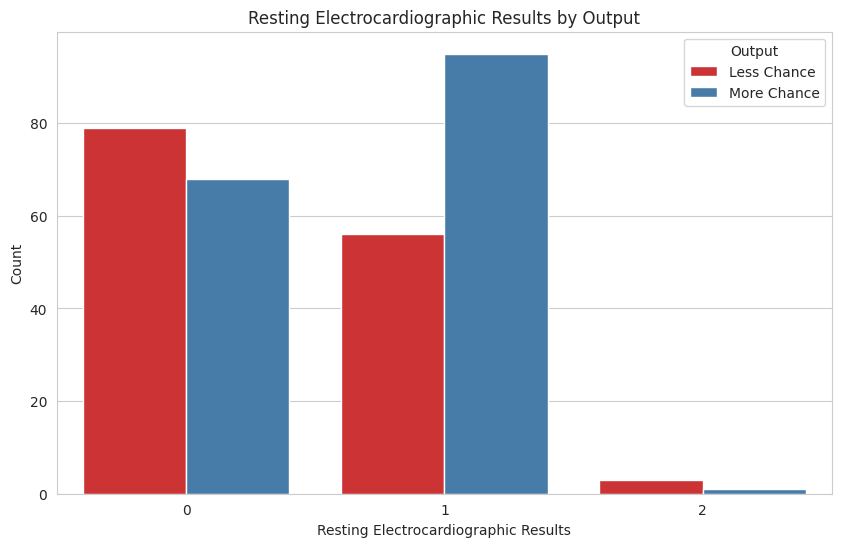

In [144]:
# Plot rest_ecg with respect to output
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='restecg', hue='output', palette='Set1')
plt.title('Resting Electrocardiographic Results by Output')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.legend(title='Output', labels=['Less Chance', 'More Chance'], loc='upper right')
plt.show

These both Plots shows that people having probable or definite left ventricular hypertrophy by Estes' criteria, are very less likely to have risk of heart attack.

# 8: Thalchh - maximum heart rate achieved

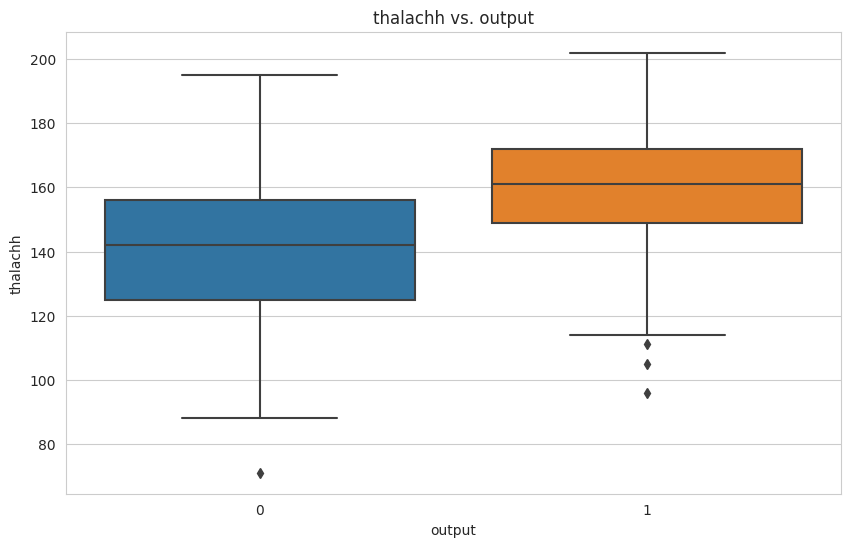

In [145]:
# Graph of 'thalachh' with 'output'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='output', y='thalachh')
plt.title('thalachh vs. output')
plt.xlabel('output')
plt.ylabel('thalachh')
plt.show()



People with high risk of Heart attack are more likely to have high Heart Rate. The average Heart rate value of people with less risk is near 140,but people with high risk are having avg value to be near 160

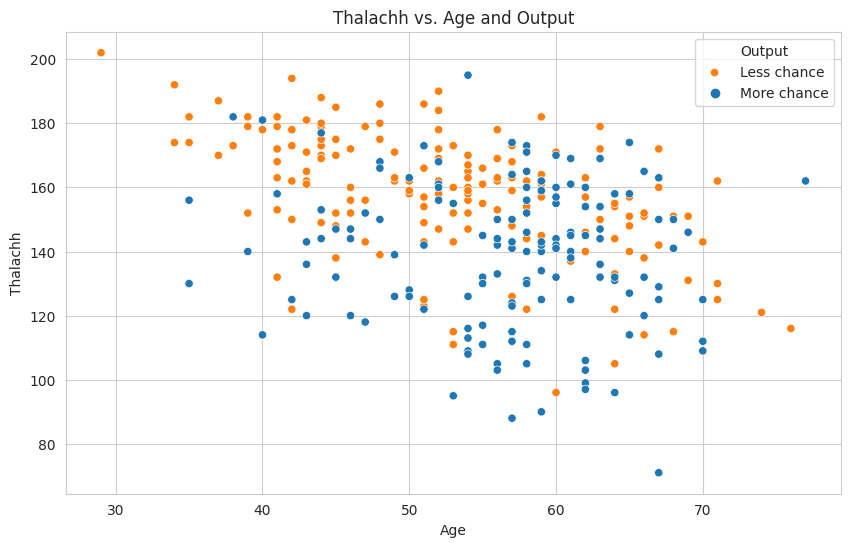

In [146]:
# Plotting thalachh with age and output
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalachh', hue='output', data=data)
plt.title('Thalachh vs. Age and Output')
plt.xlabel('Age')
plt.ylabel('Thalachh')
plt.legend(title='Output', labels=['Less chance', 'More chance'])
plt.show()

As We can see, The risk of a Heart attack are higher above the age of 50

# Missing Description of Independent variables - 
* exng - exang is the exercise induced angina which is recorded as 1 if there is pain and 0 if there is no pain
* oldpeak - oldpeak is the ST depression induced by exercise
* slp -  slope is the slope of the peak exercise ST segment
* thal is the duration of the exercise test in minutes, 3 – Normal, 6 – Fixed Defect, 7 – Reversible Defect


# 9: exng - exang is the exercise induced angina which is recorded as 1 if there is pain and 0 if there is no pain

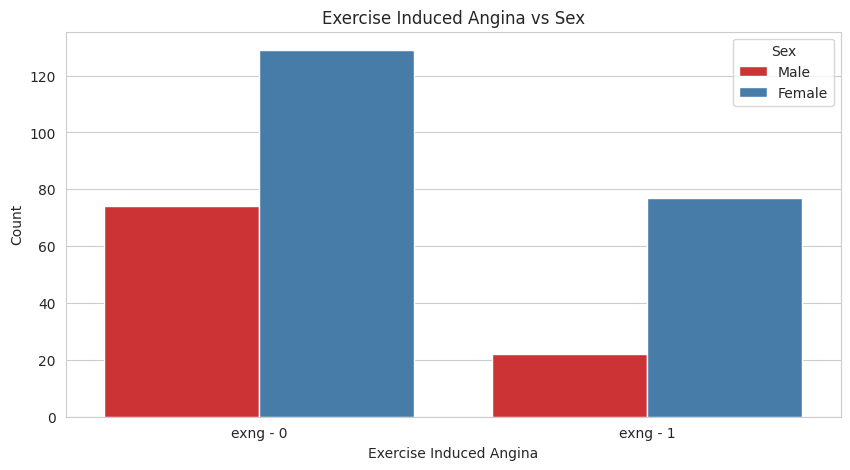

In [147]:
# Plot exng vs sex
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='exng', hue='sex', palette='Set1')
plt.title('Exercise Induced Angina vs Sex')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['exng - 0', 'exng - 1'])
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()


According to this dataset,Females are more likely to have normal exang(No pain- normal), as compared to males, maybe because of the limited dataset, and imbalance classes.

In [148]:
data['exng'].unique()

array([0, 1])

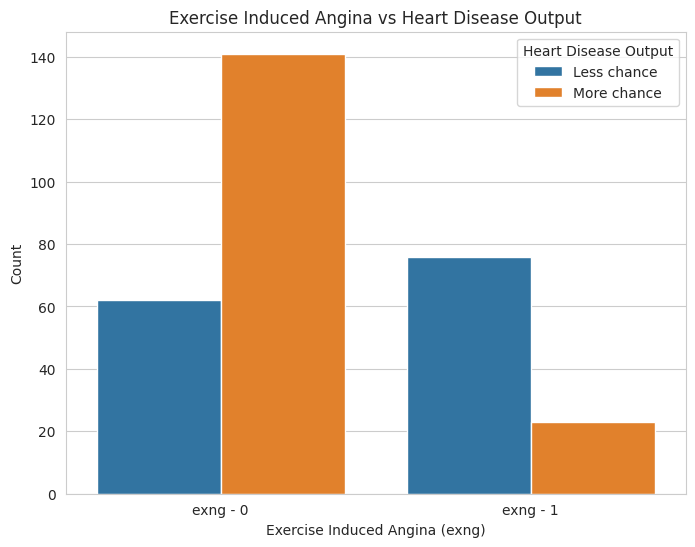

In [149]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='exng', hue='output', palette='tab10')
plt.title('Exercise Induced Angina vs Heart Disease Output')
plt.xlabel('Exercise Induced Angina (exng)')
plt.ylabel('Count')
plt.legend(title='Heart Disease Output', labels=['Less chance', 'More chance'])
plt.xticks(ticks=[0, 1], labels=['exng - 0', 'exng - 1'])  # Correct labels for exng (0 -> No, 1 -> Yes)
plt.show()


People Having Exang value of 0, which means they had no pain after exercise have a higher risk as comapre to those who are having pain.

# 10: oldpeak - It is the ST depression induced by exercise

# As no Information About this variable is provided. so, going with what I found on the web - 
* values 0 to 0.5 - Normal 
* values 0.5 to 1 - considered to be normal to mild
* values 1 to 2-2.5 - ST depression of at least 2 mm to significantly indicate reversible ischaemia. [SOURCE](https://en.wikipedia.org/wiki/ST_depression#:~:text=In%20a%20cardiac%20stress%20test,to%20significantly%20indicate%20reversible%20ischaemia.)
* values above 2.5 - indicates an adverse long term prognosis with the risk in particular, of sudden cardiac death. [SOURCE](https://pubmed.ncbi.nlm.nih.gov/1800300/#:~:text=These%20data%20suggest%20that%20profound,particular%2C%20of%20sudden%20cardiac%20death.)

In [150]:
st_depression_values = data['oldpeak']

# Define categories and corresponding labels
categories = {
    (0, 0.5): 'Normal',
    (0.5, 1): 'Mild',
    (1, 2): 'Moderate',
    (2, np.inf): 'Fatal'
}

# Function to categorize ST depression values
def categorize_st_depression(value):
    for (start, end), label in categories.items():
        if start <= value < end:
            return label
    return 'Unknown'

# Categorize ST depression values
categorized_values = [categorize_st_depression(value) for value in st_depression_values]

# Sort the categories
sorted_categories = sorted(categories.values(), key=lambda x: ['Normal', 'Mild', 'Moderate', 'Fatal'].index(x))

# Count the occurrences of each category
category_counts = {category: categorized_values.count(category) for category in sorted_categories}

print(category_counts)


{'Normal': 129, 'Mild': 36, 'Moderate': 78, 'Fatal': 59}


In [151]:
# Changing the values from ranges to labels
categories = {
    (0, 0.5): 0,
    (0.5, 1): 1,
    (1, 2): 2,
    (2, np.inf): 3
}

# Function to map values to categories
def map_to_category(value):
    for (start, end), replacement in categories.items():
        if start < value <= end:
            return replacement
    return value  # If the value doesn't fall into any category, return the original value

# Updating values in the 'oldpeak' column
data['oldpeak'] = data['oldpeak'].apply(map_to_category)

# Display the updated DataFrame
print(data['oldpeak'].unique())


[3. 2. 1. 0.]


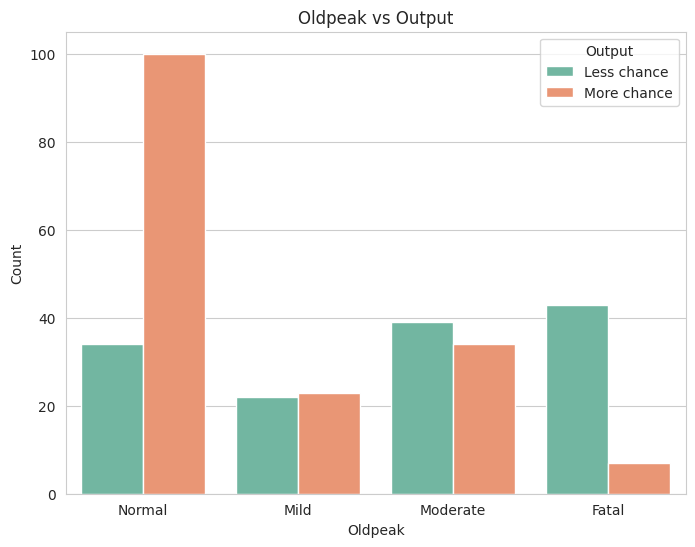

In [152]:
# Plot oldpeak vs output
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='oldpeak', hue='output', palette='Set2')
plt.title('Oldpeak vs Output')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.xticks(ticks =[0,1,2,3], labels =['Normal', 'Mild', 'Moderate', 'Fatal' ])
plt.legend(title='Output', labels=['Less chance', 'More chance'])
plt.show()


# 11: slp - slope is the slope of the peak exercise ST segment
*  0 - Normal
*  1 - Morderate
*  2 - Severe

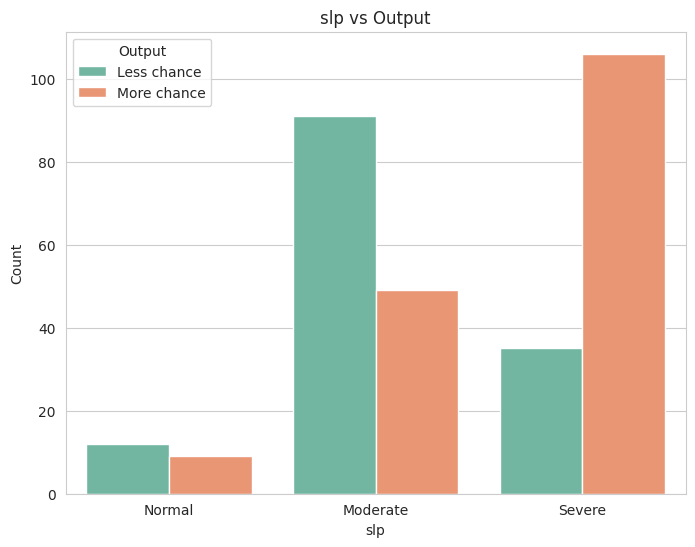

In [153]:
# Plot oldpeak vs output
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='slp', hue='output', palette='Set2')
plt.title('slp vs Output')
plt.xlabel('slp')
plt.ylabel('Count')
plt.xticks(ticks =[0,1,2], labels =['Normal', 'Moderate', 'Severe' ])
plt.legend(title='Output', labels=['Less chance', 'More chance'])
plt.show()


This graph shows that higher values of slope are asssociated with higher risk of heart attack

# 12: caa - Number of major vessels (0-3), ca is the number of major vessels colored by fluoroscopy
* 0 - **Small vessel disease (Small-VD)** refers to any pathologic process that damages small end arteries, arterioles, venules, and brain capillaries 
* 1 - In **single-vessel disease (Single-VD)**, approximately 50–70% of the vascular tree is involved with atherosclerosis and any of the involved areas could be a site of rupture potentially leading to a myocardial infarction or sudden cardiac death.
* 2 - **Multivessel coronary artery disease (MVD)** is defined as luminal stenosis of at least 70% in at least two major coronary arteries or in one coronary artery in addition to a 50% or greater stenosis of the left main trunk.
* 3 - **Triple-vessel disease (TVD)** is a severe type of sCAD since it involves significant stenosis in any 3 of the major epicardial coronary arteries (i.e., the right coronary artery, left anterior descending artery, and left circumflex artery).
* 4 - **Multivessel coronary artery disease (MCAD)** is a serious condition that involves two or more large coronary arteries narrowing due to plaque buildup. Given the importance of these arteries, people with multivessel coronary artery disease have an increased risk of heart attack and heart failure.

[SOURCE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7749259/#:~:text=Multivessel%20coronary%20artery%20disease%20(MVD,of%20the%20left%20main%20trunk.)

In [154]:
data['caa'].unique()

array([0, 2, 1, 3, 4])

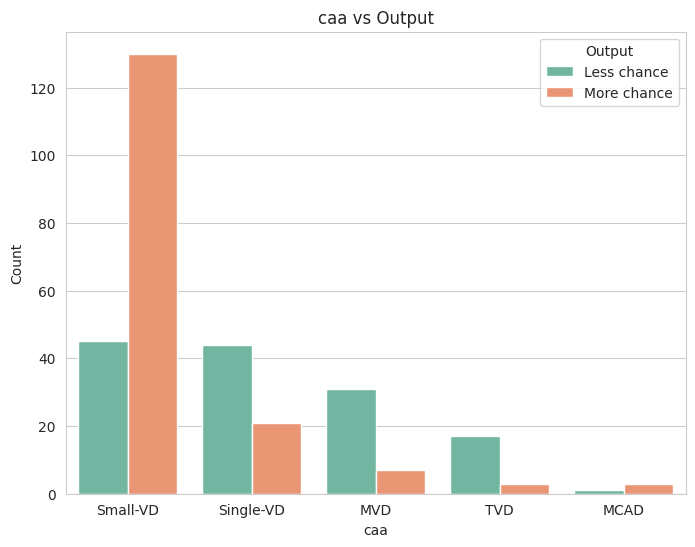

In [155]:
# Plot oldpeak vs output
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='caa', hue='output', palette='Set2')
plt.title('caa vs Output')
plt.xlabel('caa')
plt.ylabel('Count')
plt.xticks(ticks =[0,1,2,3,4], labels =['Small-VD','Single-VD','MVD','TVD','MCAD' ])
plt.legend(title='Output', labels=['Less chance', 'More chance'])
plt.show()


People with small-VD has are the ones highly associated with high risk of heart attack

# 13:  thal - A blood disorder called thalassemia 
* Value 0: NULL (dropping from the dataset previously)
* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

In [156]:
# Count of unique values in the thal column
thal_count = data['thall'].value_counts()
print(thal_count)


thall
2    165
3    117
1     18
0      2
Name: count, dtype: int64


Dropping rows where thall values is 0 (2 rows)

In [157]:
# Drop rows where thal value is 0
data = data[data['thall'] != 0]

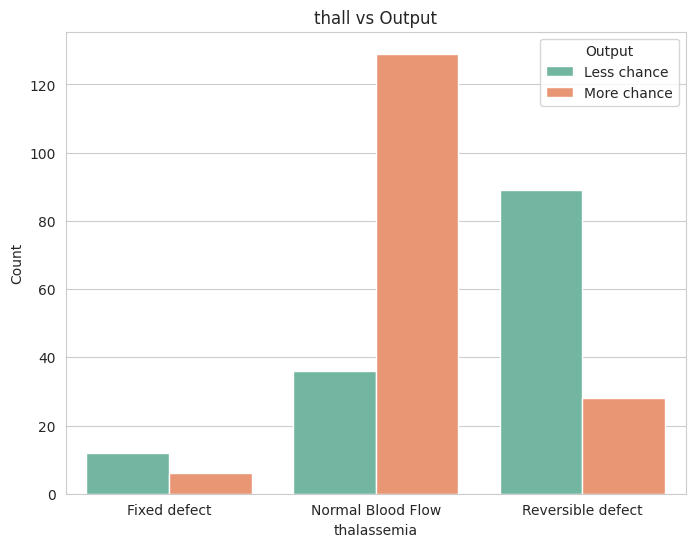

In [158]:
# Plot oldpeak vs output
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='thall', hue='output', palette='Set2')
plt.title('thall vs Output')
plt.xlabel('thalassemia')
plt.ylabel('Count')
plt.xticks(ticks=[0,1, 2], labels=['Fixed defect', 'Normal Blood Flow', 'Reversible defect'])
plt.legend(title='Output', labels=['Less chance', 'More chance'])
plt.show()


People with Normal Blood Flow are at higher risk of Heart Attack

# Correlation Matrix

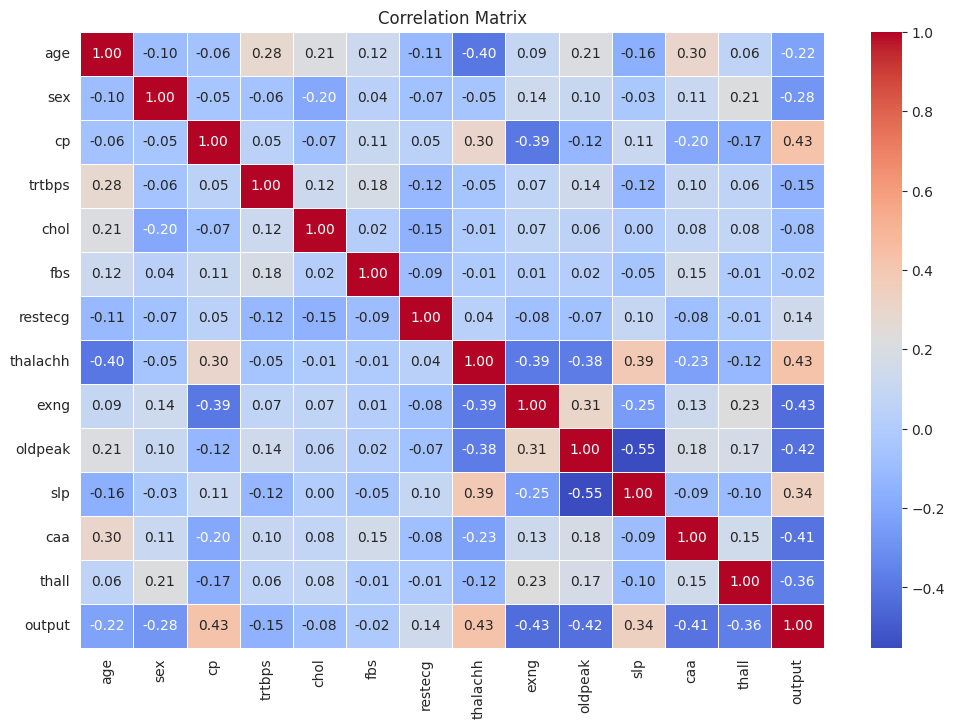

In [159]:
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model Building -Random Forest

Keeping columns with High corr with Target Variable

In [160]:
# Define the threshold for correlation value
threshold = 0.2  # Adjust as needed

# Filter the columns based on correlation values with the target variable
highly_correlated_cols = data.corr()['output'].abs() > threshold

# Keep only the columns that meet the correlation threshold
df = data.loc[:, highly_correlated_cols]

# Print the selected columns
print(df.columns)


Index(['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa',
       'thall', 'output'],
      dtype='object')


Step 1

In [161]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [162]:
# Step 2: Split the data into features (X) and target variable (y)
X = df.drop(columns=['output'])
y = df['output']

In [163]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [164]:
# Step 4: Import the Random Forest classifier
# Step 5: Instantiate the Random Forest classifier with desired hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [165]:
# Step 6: Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [166]:
# Step 7: Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


In [167]:
# Step 8: Evaluate the model's performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.85


# Other Performance metrics

In [168]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate specificity (true negative rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate false positive rate
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])

# Print the calculated metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("False Positive Rate:", fpr)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.84375
Recall: 0.8709677419354839
F1 Score: 0.8571428571428571
Specificity: 0.8275862068965517
False Positive Rate: 0.1724137931034483
Confusion Matrix:
[[24  5]
 [ 4 27]]


# Happy Kaggling

author - *Shikhar Aryan*